## Assignment Week 1: data and distributions

For this assignment, I am going to explore data from activity trackers. The data were simulated from the actual data to conform to the GDPR law. So these are not the real data, but the distributions of the variables and the relations between them are very similar.

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#### Importing `steps.csv`

In [6]:
df_steps = pd.read_csv('steps.csv', sep=';')

#### Importing `survey.csv`

In [7]:
df_survey = pd.read_csv('survey.csv')

#### Merging both dataframes

In [8]:
df = pd.merge(df_survey, df_steps, on = 'id') #'id' is the common identifier

#### Cleaning the weight data

A weight lower than 45 and higher than 155 is not very likely, so I change these values to NaN.

In [9]:
df["weight"].sort_values()

389      6.0
840     20.0
102     37.0
633     45.0
117     45.0
       ...  
549    155.0
820    155.0
43     700.0
841      NaN
923      NaN
Name: weight, Length: 929, dtype: float64

In [10]:
def filter_weight(x):
    if(x > 155.0 or x < 45.0 ): 
        return float('NaN')
    else: 
        return x

df['weight'] = df['weight'].apply(filter_weight)

### Result of the dataframe

In [11]:
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## A plot of a time series

**Task 1:** plotting of a time series of my choice

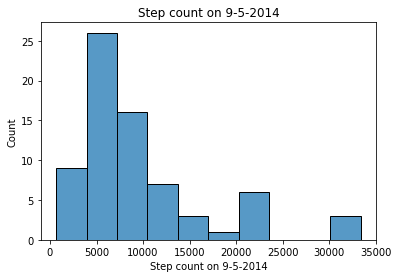

In [12]:
df['9-5-2014'].name = 'Step count on 9-5-2014' # Labeling the variable for plotting
step_count = df['9-5-2014'].dropna() # Selecting the size column. I need to drop the NA's, otherwise Seaborn won't plot

sns.histplot(step_count)
plt.title('Step count on 9-5-2014')
plt.show()

## An analysis of one quantitative variable 


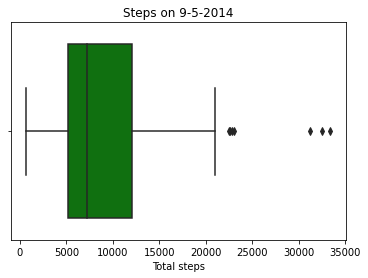

In [13]:
sns.boxplot(x=step_count, color='green')
plt.title('Steps on 9-5-2014')
plt.xlabel('Total steps')
plt.show()

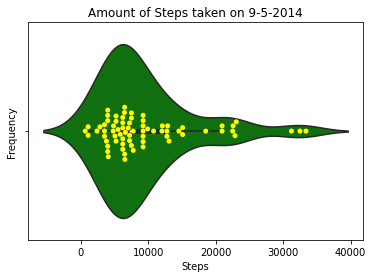

In [14]:
sns.violinplot(x = step_count, color='green')
sns.swarmplot(x = step_count, color='yellow') #default color doesn't stand out
plt.title('Amount of Steps taken on 9-5-2014')
plt.ylabel('Frequency')
plt.xlabel('Steps')
plt.show()

In [15]:
mean_steps = step_count.mean().round(0)
print(f'The mean amount of steps is: {mean_steps}')

median_steps = step_count.median().round(0)
print(f'The median amount of steps is: {median_steps}')

The mean amount of steps is: 9571.0
The median amount of steps is: 7235.0


Most people have taken between 0 and 10000 steps a day on this day, there is a small number of people who have taken a lot of steps in contrast to the rest of the group.

In [19]:
mean_steps2 = df.loc[:,"20-6-2013":"13-5-2014"].mean()

In [21]:
print(mean_steps2)

20-6-2013     3642.416667
21-6-2013     9034.724280
22-6-2013    10889.636691
23-6-2013     7402.847973
24-6-2013     8110.370056
                 ...     
9-5-2014      9570.690141
10-5-2014     7614.848837
11-5-2014     6805.925926
12-5-2014     7505.530303
13-5-2014             NaN
Length: 328, dtype: float64
